In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('cleaned_Phil.csv', low_memory=False)

In [3]:
Phil['Date_s'] = pd.to_datetime(Phil['Date_s'])

**Overall performance of the bike sharing system**

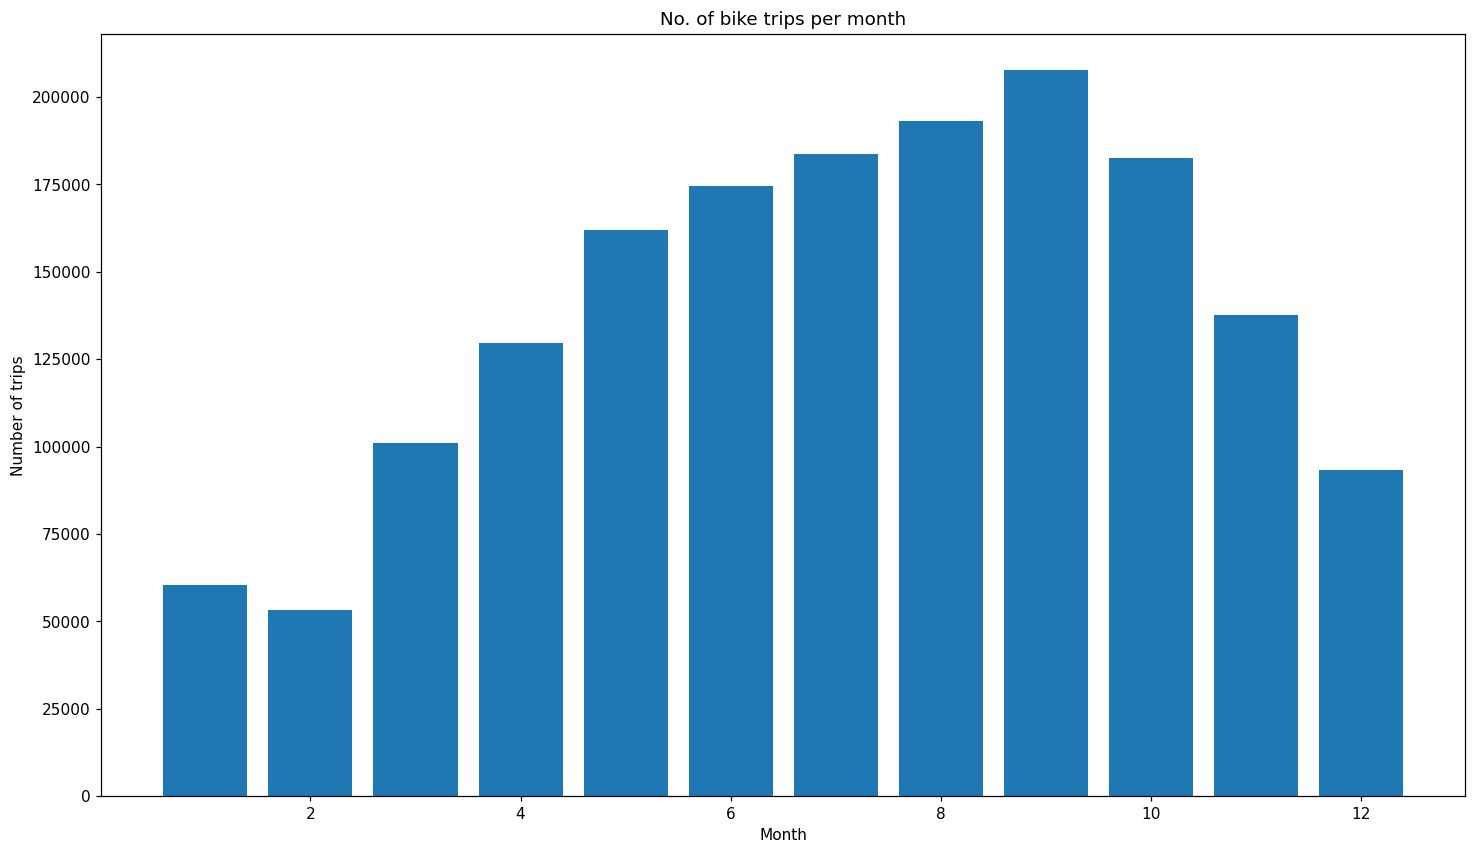

In [4]:
# usage per month
month = Phil.groupby(Phil['Date_s'].dt.month)['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(month.index, month)
plt.title("No. of bike trips per month")
plt.xlabel("Month")
plt.ylabel("Number of trips")
fig.savefig("No_of_bike_trips_per_month.jpg")
plt.show()

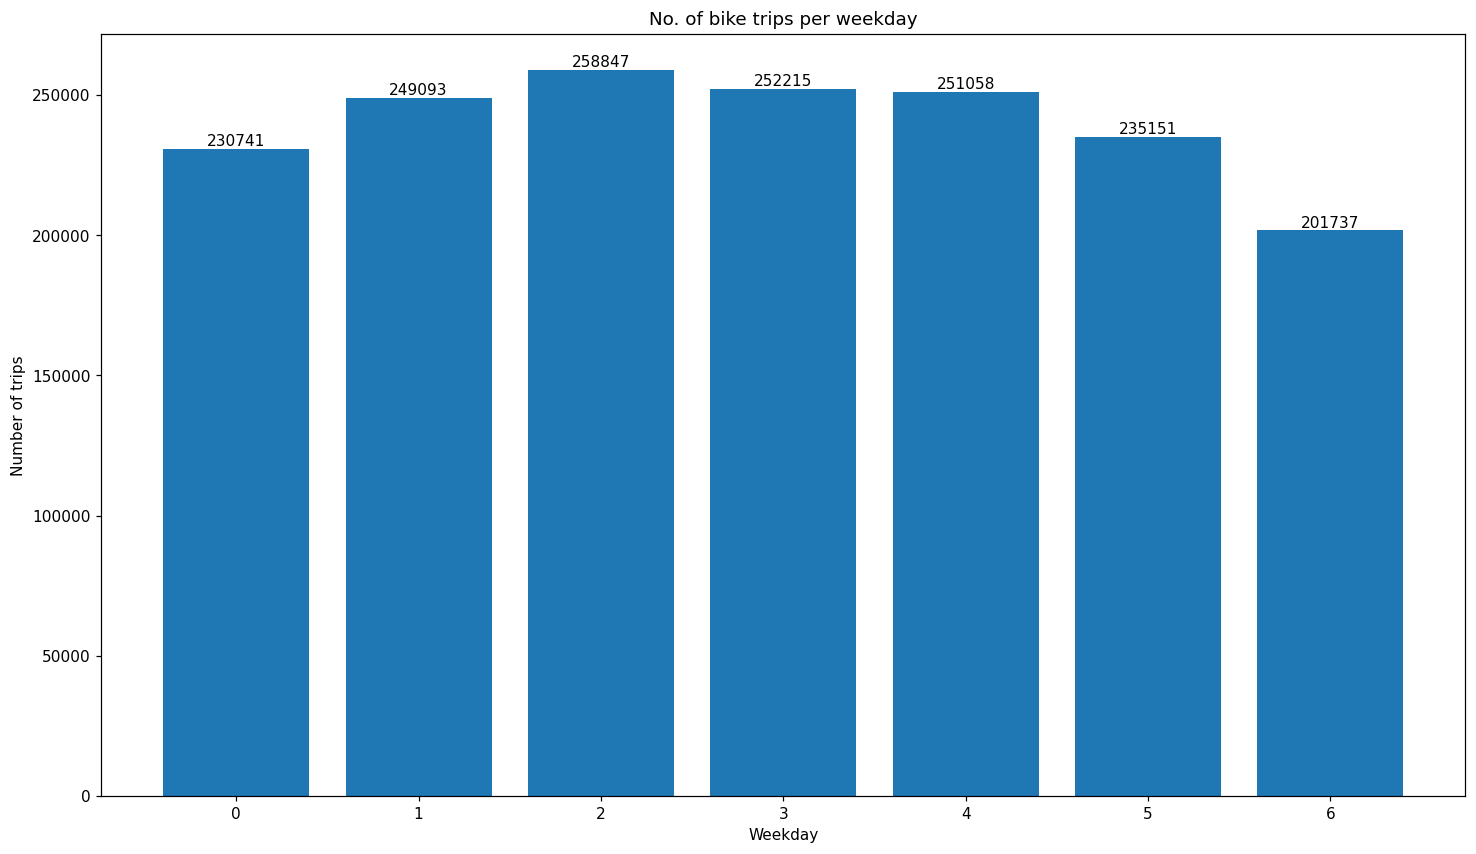

In [5]:
# usage per weekday
weekday = Phil.groupby(['Weekday_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16,9), dpi = 110)
ax.bar(weekday.index, weekday)
# Add labels to the bars
for i, v in enumerate(weekday):    
    ax.text(i, v + 50, str(v), ha='center', va='bottom') 
plt.title("No. of bike trips per weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of trips")
fig.savefig("No_of_bike_trips_per_weekday.jpg")
plt.show()

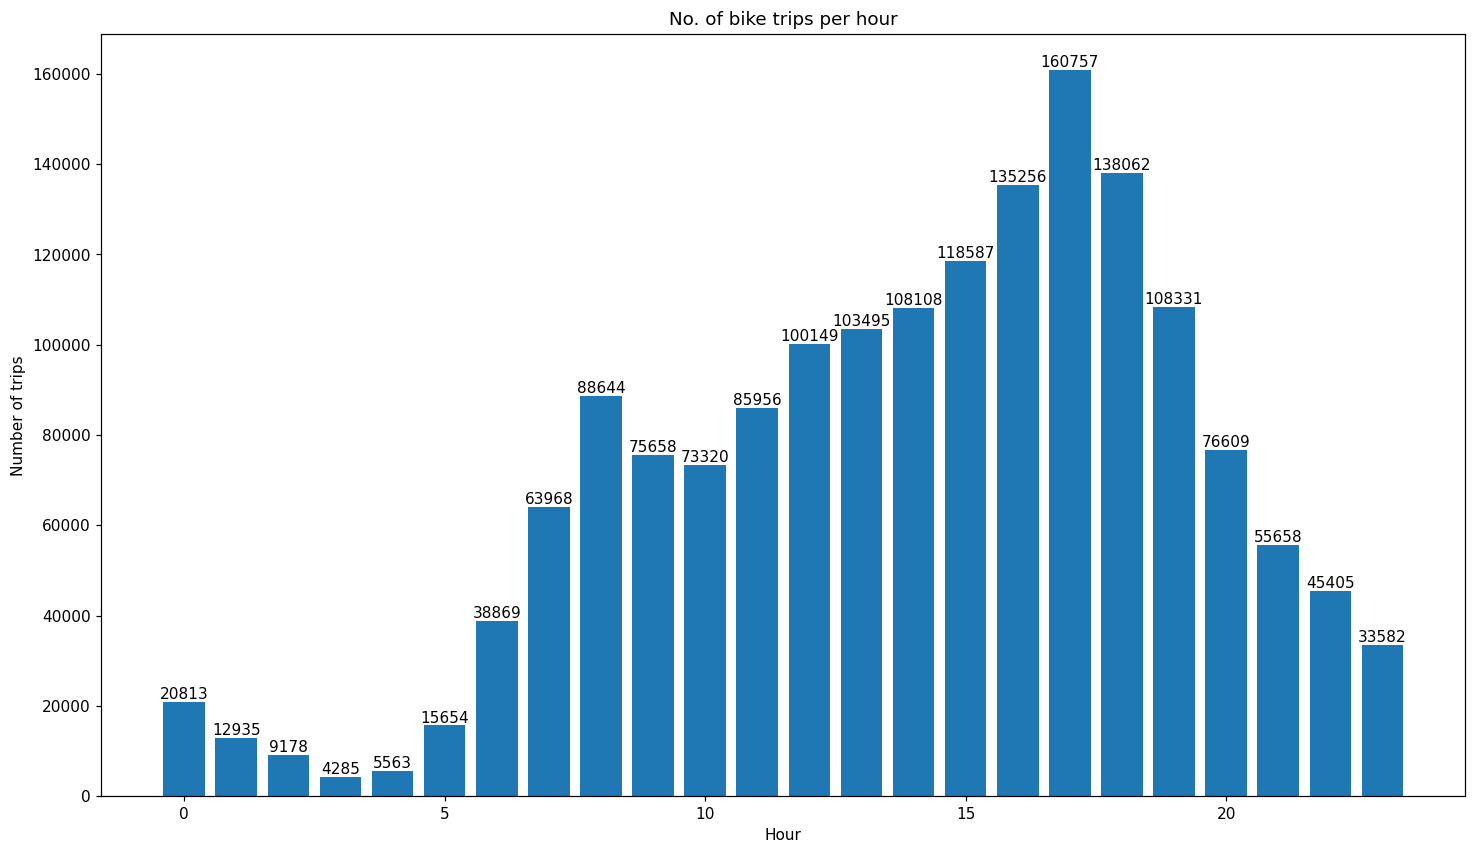

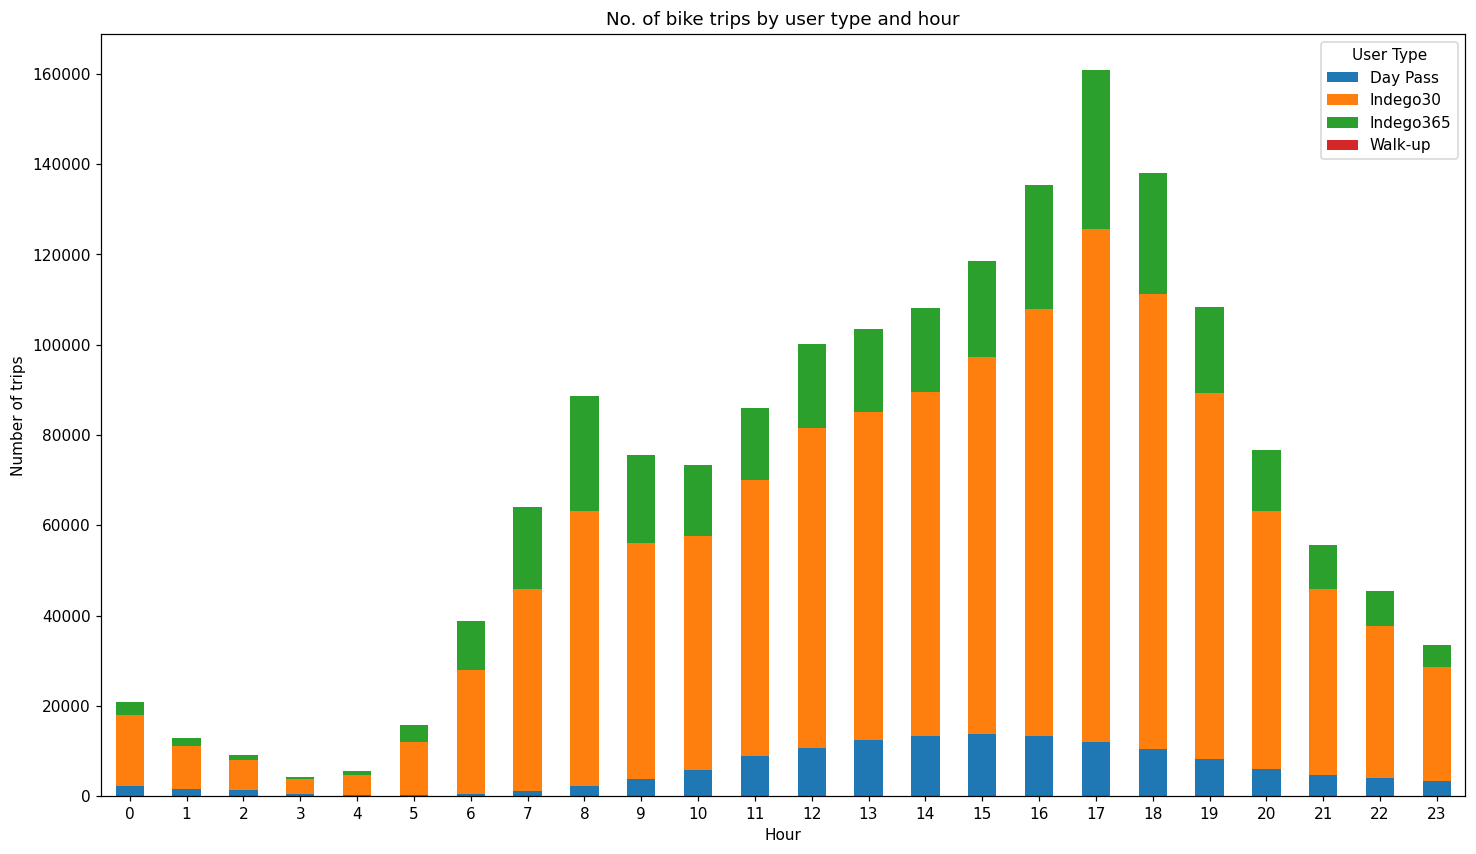

In [6]:
# Usage per hour
hour = Phil.groupby(['Hour_s'])['trip_id'].nunique()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.bar(hour.index, hour)
plt.title("No. of bike trips per hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips")

# Add labels to the bars
for i, v in enumerate(hour):    
    ax.text(i, v + 50, str(v), ha='center', va='bottom') 
# i: index of hour,  v: value of trip_id,  ha: horizintal alignment,  va: vertical alignment
fig.savefig("No_of_bike_trips_per_hour.jpg")
plt.show()

# stacked bar chart
grouped = Phil.groupby(['Hour_s', 'passholder_type'])['trip_id'].nunique().unstack()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation = 0)
plt.title("No. of bike trips by user type and hour")
plt.xlabel("Hour")
plt.ylabel("Number of trips")
plt.legend(title='User Type')
fig.savefig("No_of_bike_trips_by_user_type_and_hour.jpg")
plt.show()

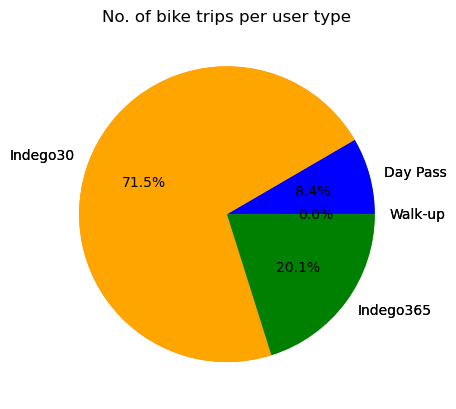

In [7]:
user = Phil.groupby(['passholder_type'])['trip_id'].nunique()

colors = ['blue', 'orange', 'green', 'red']
fig, ax = plt.subplots()
ax.pie(user, labels=user.index)
ax.pie(user, labels=user.index, autopct='%1.1f%%', colors=colors)
plt.title("No. of bike trips per user type")
fig.savefig("No_of_bike_trips_per_user_type.jpg")
plt.show()

In [8]:
# Distribution of passholder type and bike type
pivot_table = Phil.pivot_table(index='passholder_type', columns='bike_type', aggfunc='size')
pivot_table

bike_type,electric,standard
passholder_type,,
Day Pass,56850,84059
Indego30,458129,741779
Indego365,109365,228648
Walk-up,5,7


for later: dividing in Day Pass/Walk-up and Indego30/Indego365
           -> presumption that group 1 are tourists

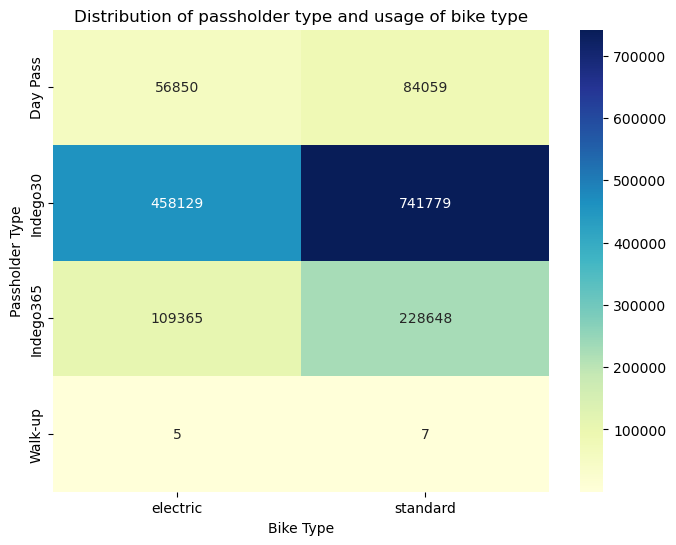

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f') #from yellow for low values, through green, to dark blue for high values.
plt.title('Distribution of passholder type and usage of bike type')
plt.xlabel('Bike Type')
plt.ylabel('Passholder Type')
plt.savefig("Distribution_of_passholder_type_and_usage_of_bike_type.jpg")
plt.show()

In [10]:
Phil['duration'].mean()
Phil.groupby(['passholder_type', 'bike_type'])['duration'].mean()
Phil.groupby(['bike_type', 'passholder_type'])['duration'].mean().unstack()

passholder_type,Day Pass,Indego30,Indego365,Walk-up
bike_type,,,,
electric,37.516799,16.526044,12.879989,86.800000
standard,36.290237,17.674206,12.959680,41.428571


In [11]:
# how many eclecttric and standard bikes
Phil['bike_id'].nunique()
Phil.groupby(['bike_type'])['bike_id'].nunique()

bike_type
electric    1204
standard    1169
Name: bike_id, dtype: int64

In [12]:
# rides with the different bikes, maybe important for maintenance and idle time
Phil.groupby(['bike_type'])['bike_id'].count()
Phil.groupby(['bike_type'])['trip_id'].count()

bike_type
electric     624349
standard    1054493
Name: trip_id, dtype: int64

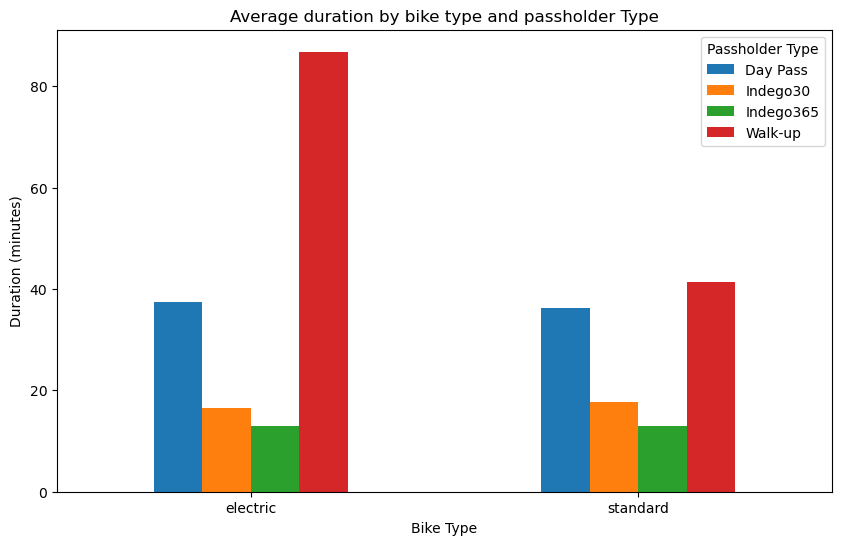

In [13]:
dura = Phil.groupby(['bike_type', 'passholder_type'])['duration'].mean().unstack()

# average durtion by biky type and passholder type
ax = dura.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Bike Type')
ax.set_title('Average duration by bike type and passholder Type')
ax.legend(title='Passholder Type')

plt.xticks(rotation=0)
plt.savefig("Average_duration_by_bike_type_and_passholder_type.jpg")
plt.show()

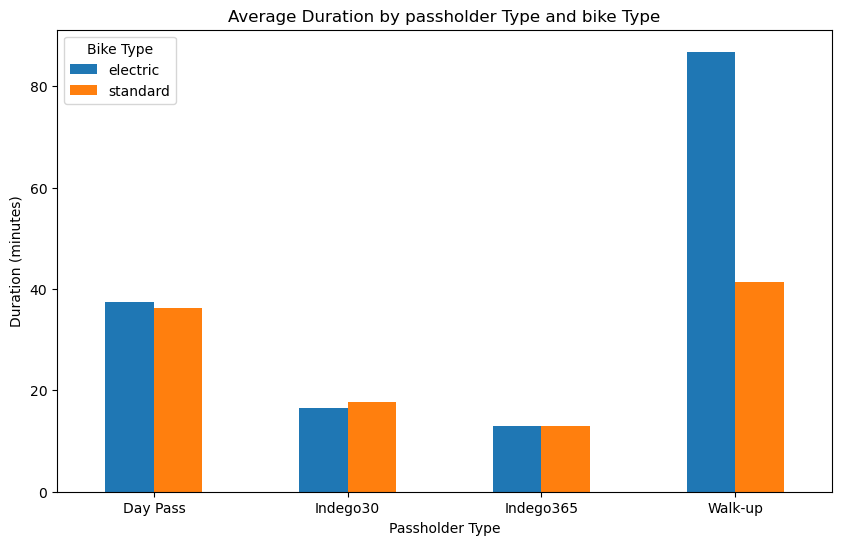

In [14]:
ura = Phil.groupby(['passholder_type', 'bike_type'])['duration'].mean().unstack()

# average durtion by biky type and passholder type
ax = ura.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Duration (minutes)')
ax.set_xlabel('Passholder Type')
ax.set_title('Average Duration by passholder Type and bike Type')
ax.legend(title='Bike Type')
plt.xticks(rotation=0)
plt.savefig("Average_duration_by_passholder_type_and_bike_type.jpg")
plt.show()

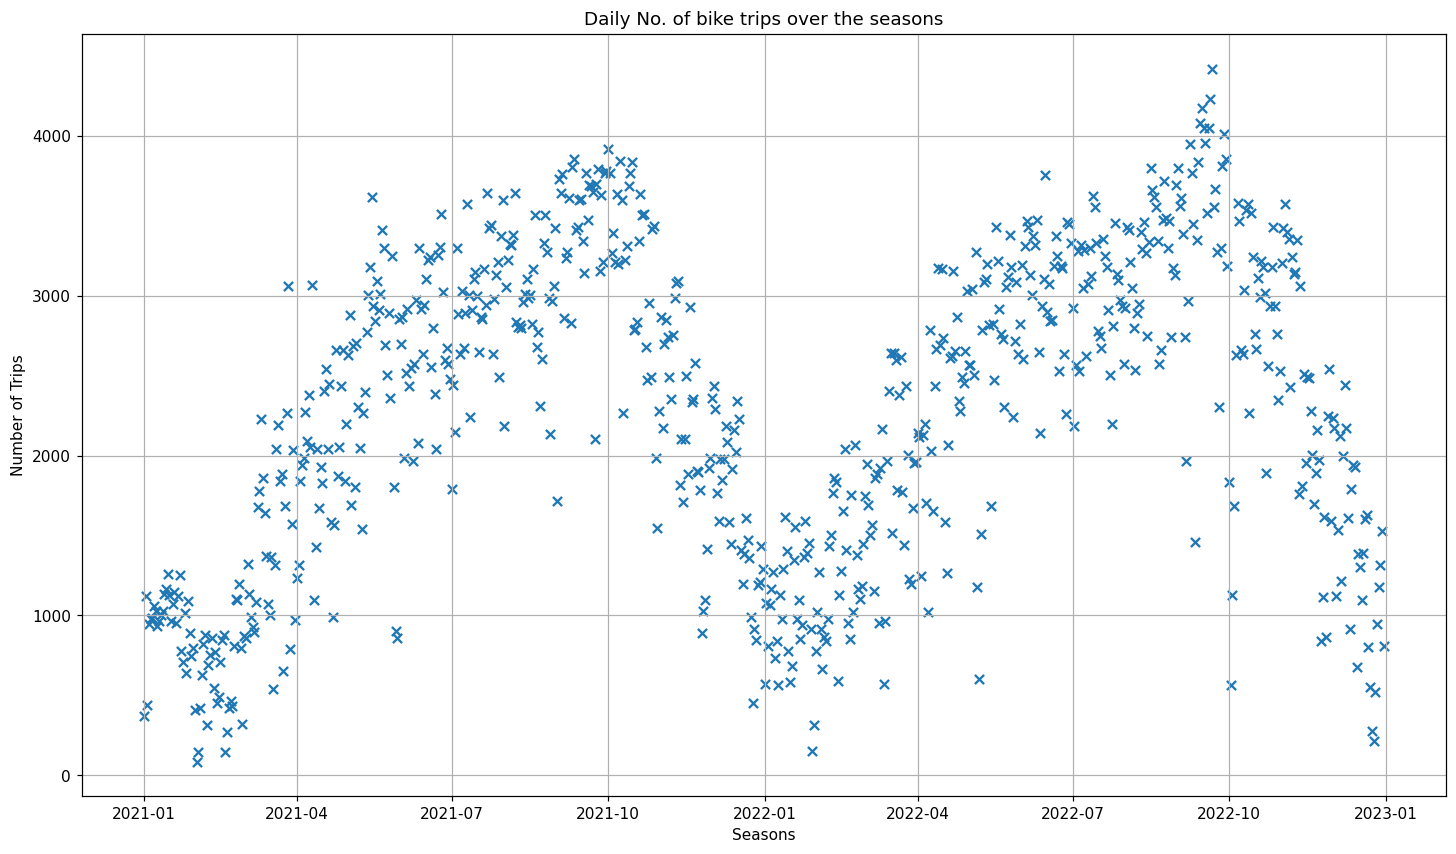

In [15]:
daily_trips = Phil.groupby('Date_s')['trip_id'].count()

### daily No. of bike trips over the year as scatter
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.scatter(daily_trips.index, daily_trips.values, marker="x")
plt.grid()
plt.title("Daily No. of bike trips over the seasons")
plt.xlabel("Seasons")
plt.ylabel("Number of Trips")
fig.savefig("Daily_No_of_bike_trips_over_the_seasons.jpg")
plt.show()

In [16]:
Weather = pd.read_csv('cleaned_Weather.csv', low_memory=False)

In [17]:
Weather['timestamp'].dtype

dtype('O')

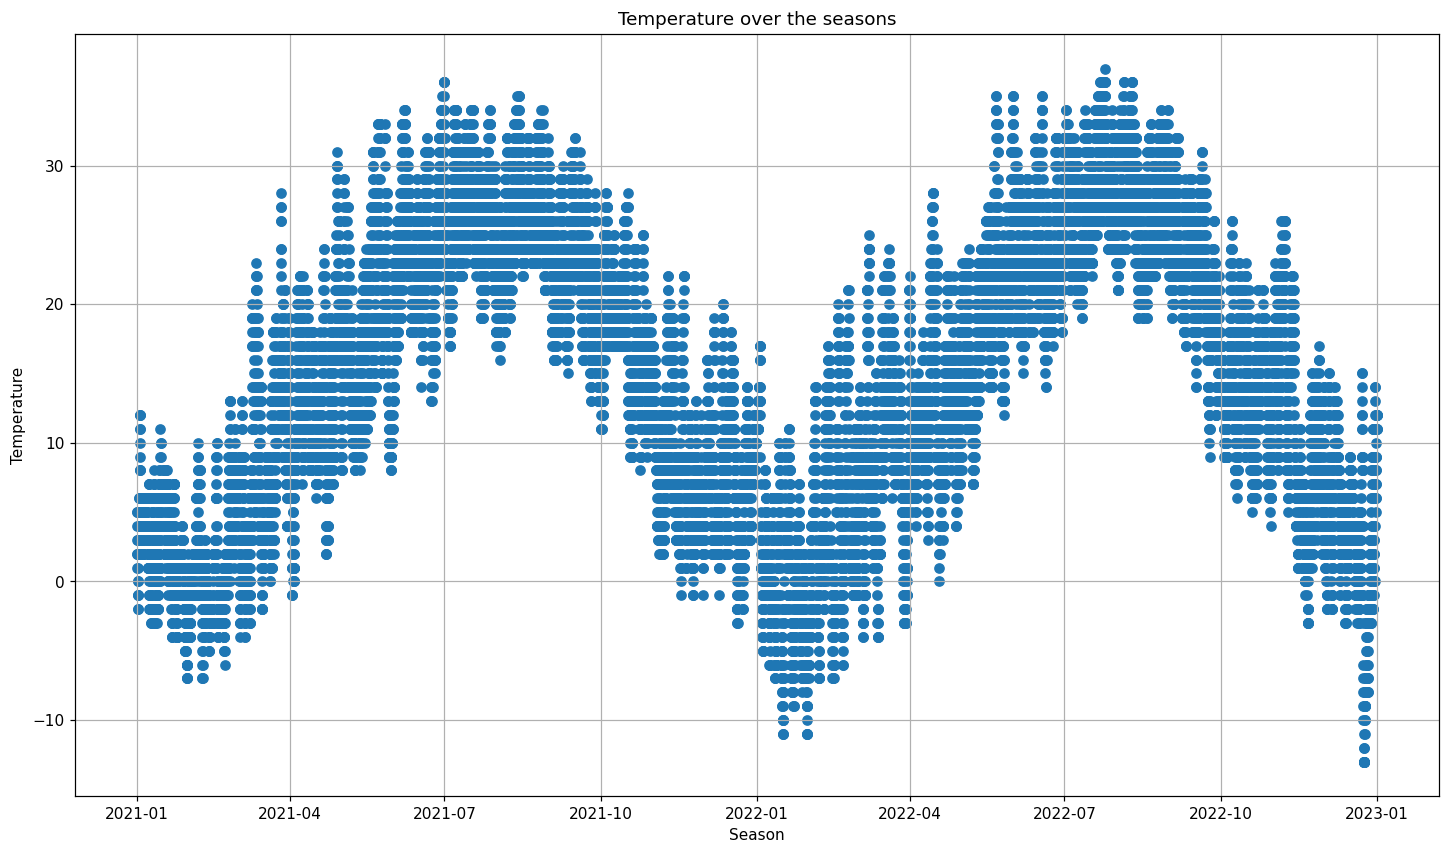

In [18]:
Weather['timestamp']=pd.to_datetime(Weather['timestamp'])
daily_weather = Weather.groupby(['timestamp'])['temperature'].mean()
fig, ax = plt.subplots(figsize=(16, 9), dpi=110)
ax.scatter(daily_weather.index, daily_weather, marker = "o")
plt.title('Temperature over the seasons')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.grid()
fig.savefig("Temperature_over_the_seasons.jpg")
plt.show()